In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
df = pd.read_csv("synthetic_dataset.csv")
#reading the synthetic dataset

In [26]:
import os
os.listdir()


['.config', 'synthetic_dataset.csv', 'sample_data']

In [27]:
df = pd.read_csv("synthetic_dataset.csv")
print(df.head())
print(df.info())


  Category   Price    Rating         Stock  Discount
0      NaN  5548.0  1.870322           NaN       0.0
1      NaN  3045.0  4.757798           NaN      38.0
2      NaN  4004.0       NaN      In Stock       0.0
3      NaN  4808.0  1.492085           NaN      33.0
4      NaN  1817.0       NaN  Out of Stock      23.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4362 entries, 0 to 4361
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  1614 non-null   object 
 1   Price     4188 non-null   float64
 2   Rating    2312 non-null   float64
 3   Stock     3010 non-null   object 
 4   Discount  3970 non-null   float64
dtypes: float64(3), object(2)
memory usage: 170.5+ KB
None


In [28]:
print(df.columns)

# Correlation-based selection
corr = df.corr(numeric_only=True)
print(corr)


Index(['Category', 'Price', 'Rating', 'Stock', 'Discount'], dtype='object')
             Price    Rating  Discount
Price     1.000000  0.021099  0.009300
Rating    0.021099  1.000000  0.015028
Discount  0.009300  0.015028  1.000000


In [29]:
# Check missing values
print(df.isnull().sum())

# Fill numeric missing values with mean
df.fillna(df.mean(numeric_only=True), inplace=True)

# Fill categorical missing values with mode
for col in df.select_dtypes(include='object'):
    df[col].fillna(df[col].mode()[0], inplace=True)

print(df.isnull().sum())


Category    2748
Price        174
Rating      2050
Stock       1352
Discount     392
dtype: int64
Category    0
Price       0
Rating      0
Stock       0
Discount    0
dtype: int64


/tmp/ipython-input-2010825414.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [30]:
# Discretize Price column
df['Price_bin'] = pd.cut(df['Price'], bins=3, labels=['Low', 'Medium', 'High'])
print(df[['Price', 'Price_bin']].head())


    Price Price_bin
0  5548.0    Medium
1  3045.0       Low
2  4004.0    Medium
3  4808.0    Medium
4  1817.0       Low


In [31]:
df.loc[0, 'Price'] = 100000  # Artificial outlier

In [32]:
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1

df = df[(df['Price'] >= Q1 - 1.5 * IQR) &
        (df['Price'] <= Q3 + 1.5 * IQR)]


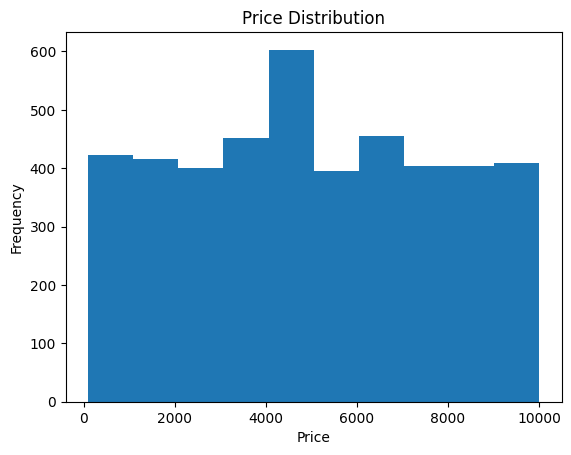

In [33]:
plt.hist(df['Price'])
plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()


In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
print(df.columns)


In [ ]:
if len(df.columns) >= 2:
    x = df.columns[0]
    y = df.columns[1]

    sns.scatterplot(x=x, y=y, data=df)
    plt.title("Multivariate Analysis")
    plt.show()

In [ ]:
plt.scatter(df['Price'], df['Rating'])
plt.xlabel("Price")
plt.ylabel("Rating")
plt.title("Price vs Rating")
plt.show()


✅ PRE-LAB ANSWERS (Theory)
1. Attribute Selection Methods

Attribute selection means choosing important features from the dataset.

Methods:

Filter methods – Correlation, Chi-Square, Information Gain

Wrapper methods – Forward selection, Backward elimination

Embedded methods – LASSO, Ridge Regression, Decision Tree feature importance

Variance Threshold method

2. Methods to Handle Missing Values

Missing values ante empty/null data.

Methods:

Remove rows with missing values

Remove columns with missing values

Replace with mean (numerical)

Replace with median

Replace with mode (categorical)

Forward fill / Backward fill

Prediction based imputation (ML models)

3. Discretization (with example)

Discretization means converting continuous values into groups (bins).

Example:
Age →

0–18 : Child

19–40 : Adult

41–60 : Middle Age

60+ : Senior

Types:

Equal width binning

Equal frequency binning

4. Outlier Elimination Methods

Outliers ante abnormal values.

Methods:

Z-Score method

IQR (Inter Quartile Range)

Box plot method

Winsorization

Clipping

5. Univariate vs Multivariate Analysis
Univariate	Multivariate
One variable analysis	More than one variable
Histogram, Boxplot	Scatter plot, Correlation
Example: Salary	Salary vs Experience

In [ ]:
2  @